1. Importing Every Library required

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

2. Read dataset

In [42]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pima Indians Diabetes Dataset.csv")

3. Top 5 tuples

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


4. Bottom 5 tuples

In [44]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


5. Shape of Dataset

In [45]:
df.shape

(768, 9)

6. Information of data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


7. Describe the data frame

In [47]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


8. Making 0 values null values

In [48]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']].replace(0,np.NAN)

9. Finding missing values if any

In [49]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

10. Fixing null values by mean/median/mode

In [50]:
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

11. Maximum of every column

In [51]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

12. Minimum of every column

In [52]:
df.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

13. Correlation

In [53]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


14. Number of Diabitic and Non-diabitic people

In [54]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

15. Heatmap

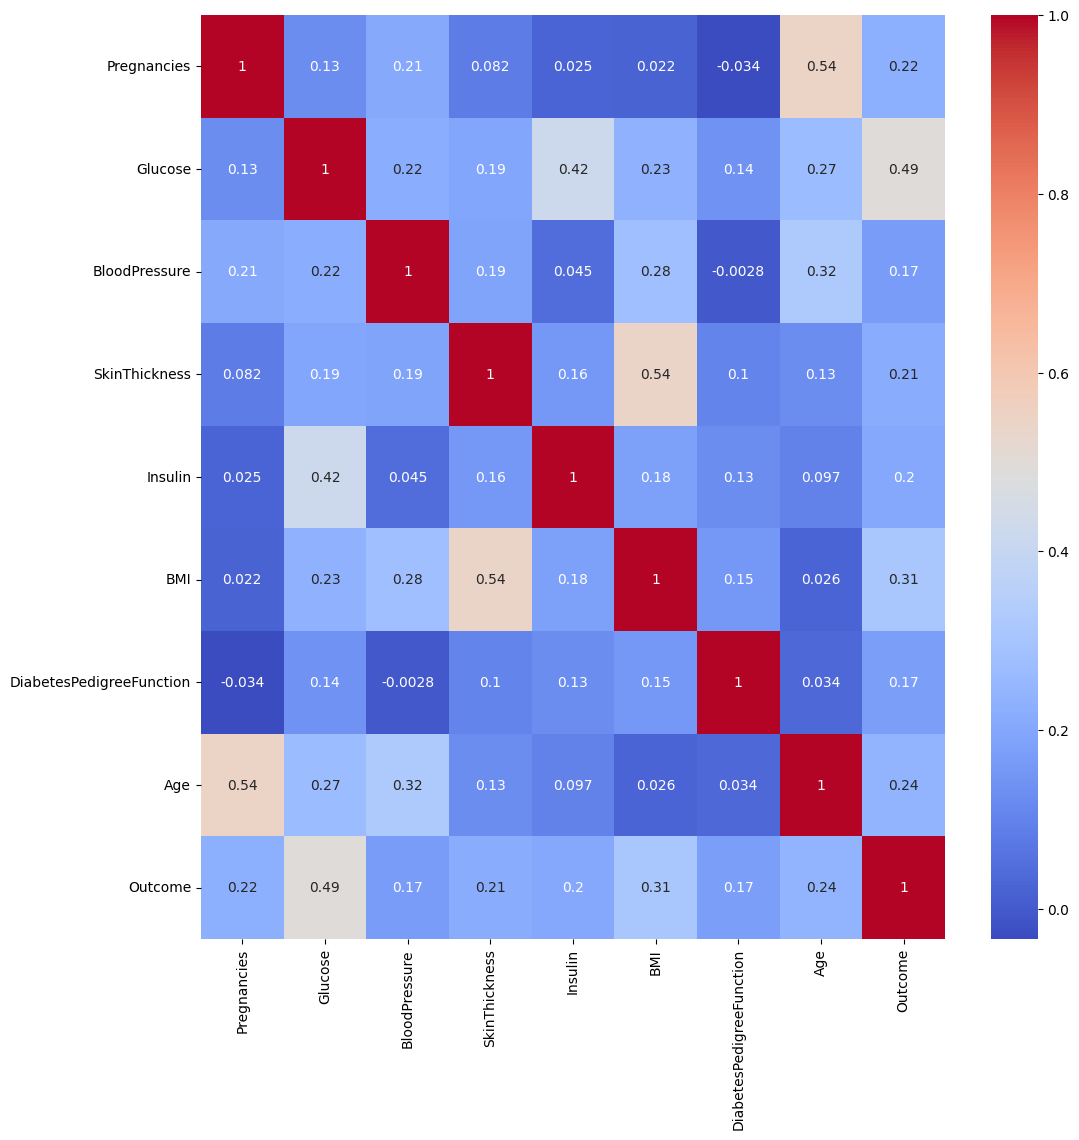

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

16. Splitting feature and target

In [56]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

17. Scaling Data

In [57]:
sc=StandardScaler()
X=sc.fit_transform(X)

18. Splitting the data into 70% Training data & 30% Testing Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


19. Balancing data

In [60]:
sm = SMOTE(random_state = 2)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

20. Training Model

In [61]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [63]:

param_grid = {
    'n_estimators': np.arange(100,501,100),
    'max_depth': np.arange(20, 31, 1),
    'min_samples_split': np.arange(2 , 6 , 1),
    'min_samples_leaf': np.arange(1, 5, 1)
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train_bal, y_train_bal)

print("Best hyperparameters:", grid_search.best_params_)
best_params=grid_search.best_params_
best_model = grid_search.best_estimator_


Best hyperparameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [65]:
y_pred= best_model.predict(X_test)

In [68]:
report = classification_report(y_test, y_pred)
print("Random forest",report)

Random forest               precision    recall  f1-score   support

           0       0.82      0.80      0.81       155
           1       0.61      0.64      0.63        76

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



# Building a Predictive System

In [70]:
input_data = (2,160,60,28,130,25.5,2.128,38)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
print(prediction)

print("The person has Diabetes" if prediction[0] else "The person does not have Diabetes")

[1]
The person has Diabetes
